Loss at 0 th epoch = 36.830604389031016
Loss at 100 th epoch = 0.001996222573010821
Loss at 200 th epoch = 0.0008462957124312924
Loss at 300 th epoch = 0.0005155688335034297
Loss at 400 th epoch = 0.0004204495011447188
Loss at 500 th epoch = 0.000393092524845429
Loss at 600 th epoch = 0.00038522446970162675
Loss at 700 th epoch = 0.000382961562753554
Loss at 800 th epoch = 0.00038231073510147927
Loss at 900 th epoch = 0.00038212355257810583
Loss at 1000 th epoch = 0.00038206971759284183
Loss at 1100 th epoch = 0.00038205423427962684
Loss at 1200 th epoch = 0.00038204978117191153
Loss at 1300 th epoch = 0.00038204850042740656
Loss at 1400 th epoch = 0.0003820481320764528
Loss at 1500 th epoch = 0.00038204802613617397
Loss at 1600 th epoch = 0.00038204799566702056
Loss at 1700 th epoch = 0.0003820479869038822
Loss at 1800 th epoch = 0.0003820479843835397
Loss at 1900 th epoch = 0.0003820479836586731
Loss at 2000 th epoch = 0.0003820479834501977
Loss at 2100 th epoch = 0.00038204798339023

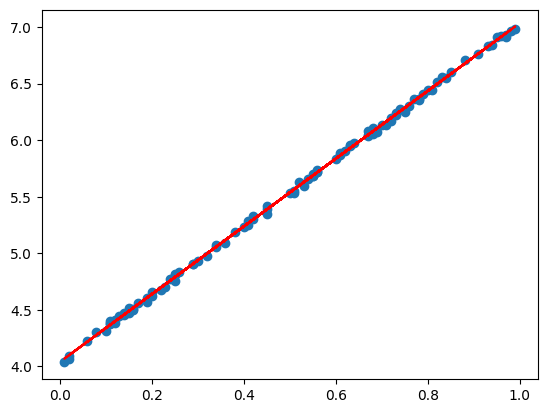

In [14]:
#Linear Regression using single and multiple variables
#Important point: The learning rate is influenced by the number of samples and the values of the samples
import numpy as np
import random
import matplotlib.pyplot as plt
##Class to implement Linear Regression
class LinearRegression:
    def __init__(self,samples,features,learning_rate,epochs,noise):
        self.X_samples = samples              # Number of Samples = self.X_samples
        self.X_features = features            # Number of features = self.X_features
        self.learning_rate = learning_rate    # Learning Rate = self.learning_rate
        self.epochs = epochs                  # Iterations = self.epochs
        self.noise = noise                    # Influence of noise = self.noise 
    
    ##Create a random Data sample for X using the number of samples and the number of features  
    def XSamples(self):
        return np.round(np.random.uniform(0,1,(self.X_samples,self.X_features)),2)
    
    ##Create thw output samples for the input samples.
    ## y = w1x1+w2x2+w3x3+......wnxn+b (Equation of linear Reression)
    ##Use random weight values to obtain the values of [w1,w2,w3,...,wn] for the output y
    def ySamples(self,X):
        temp = np.zeros(X.shape)
        for i in range(self.X_features):
            temp[:,i] = random.randint(1,8)*X[:,i]
        y = np.array([np.sum(temp,axis=1)]).T+np.array(random.randint(1,10))
        return y+self.noise*np.random.random((y.shape))
    
    ##Calcluate the value of linear regression variable for training
    ## z = Xw+b - Equation of the regression variable
    def forwardPropagation(self,X,w,b):
        return np.dot(X,w.T)+b
    
    ##Find the derivatives for back propagation
    ## dL = dL/dz, dz = dz/dw
    ## dL/dw = (dL/dz)*(dz/dw)
    ## dL/db = (dl/dz)*(dz/db)
    def derivative(self,X,y,z):
        dL = (y-z)/self.X_samples
        dz = X
        return (dL,dz)
    
    ##Update the weights after each iteration
    ## dw = dL/dw
    ## db = dL/db
    def backwardPropagation(self,dL,dz):
    # print(dJ.shape,dz_w.shape,dz_b.shape)
        dw = np.dot(dL.T,dz)
    # print(dw.shape)
        db = np.sum(dL)
    # print(db.shape)
        return (dw,db)
    
    ##Initialize the weights and bias to any random values
    def randomWeightsandBias(self,X):
        w = np.random.uniform(-1,1,(1,X.shape[1]))
        b = np.random.uniform(-1,1,(1,1))
        return (w,b)
    
    ##Train the model
    def train_model(self):
        X = self.XSamples()                                     ##Get the input values
        y = self.ySamples(X)                                    ##Get output values corresponding to input for linear regression
        (w,b) = self.randomWeightsandBias(X)                    ##Get the random weights and bias values
        ##Training the model over epochs number of iterations
        for i in range(self.epochs):
            z = self.forwardPropagation(X,w,b)                  ##Calculate thw regression variable after each iterations
            if i%100 == 0:
                loss = np.sum(np.square(y-z))/self.X_samples
                print('Loss at',i,'th epoch =',loss)            ##Print the loss values after 100 iterations
            (dL,dz) = self.derivative(X,y,z)                    ##Derivativecs for back propagations
            (dw,db) = self.backwardPropagation(dL,dz)                 ##Get dw and db
            w = w+self.learning_rate*dw                         ##Update weights after each iteration
            b = b+self.learning_rate*db                         ##Update bias after each iteration
        print(w,b)                                              ##Print final weights and bias values
        if self.X_features == 1:                                ##Plot graph if only one feature 
            z = np.ravel(w*X+b)
            plt.scatter(np.ravel(X),y)
            plt.plot(np.ravel(X),z,color = 'red')

##Instantiate the object
lr = LinearRegression(samples=100,features=1,
                      learning_rate=0.1,
                      epochs=5000,noise=0.07)
lr.train_model()